In [1]:
import cv2 
import uuid
import os
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

Reading data from .csv files

In [2]:
train = pd.read_csv('Tensorflow/workspace/images/train/sign_mnist_train.csv')
test = pd.read_csv('Tensorflow/workspace/images/test/sign_mnist_test.csv')

In [3]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


Adding label and calculating number of datasets for each label

In [4]:
labels = train['label'].values

In [5]:
label_array=np.array(labels)
np.unique(label_array)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])

<AxesSubplot:ylabel='count'>

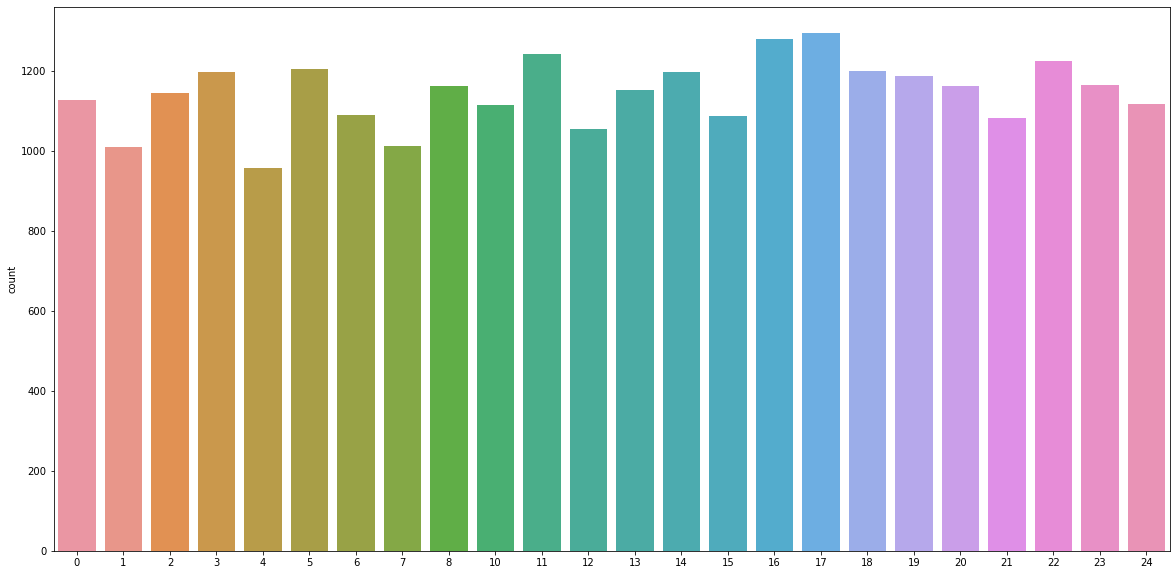

In [6]:
plt.figure(figsize=(20,10))
sns.countplot(x=labels)

Above we can see that each label 0-24 has around 900-1300 images

Refining the data to such that only pixels are left i.e removing labels

In [7]:
train.drop('label',axis = 1,inplace = True)
train.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,107,118,127,134,139,143,146,150,153,156,...,207,207,207,207,206,206,206,204,203,202
1,155,157,156,156,156,157,156,158,158,157,...,69,149,128,87,94,163,175,103,135,149
2,187,188,188,187,187,186,187,188,187,186,...,202,201,200,199,198,199,198,195,194,195
3,211,211,212,212,211,210,211,210,210,211,...,235,234,233,231,230,226,225,222,229,163
4,164,167,170,172,176,179,180,184,185,186,...,92,105,105,108,133,163,157,163,164,179


Extracting Images data from each row in our .csv

In [8]:
images= train.values 
images= np.array([np.reshape(i,(28,28)) for i in images])
images= np.array([i.flatten() for i in images])

Hot one encoding the labels

In [9]:
from sklearn.preprocessing import LabelBinarizer

label_binar = LabelBinarizer()
labels = label_binar.fit_transform(labels)
labels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

View images

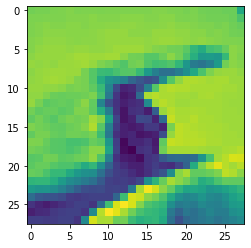

In [10]:
plt.imshow(images[33].reshape(28,28))

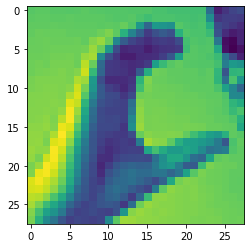

In [11]:
plt.imshow(images[2].reshape(28,28))

Spliting our dataset into x_train, x_test, y_train, y_test

In [12]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size= 0.3, random_state=101)

Scale our images

In [13]:
x_train = x_train/255
x_test = x_test/255

Reshape images to the size required by Tensorflow and Keras

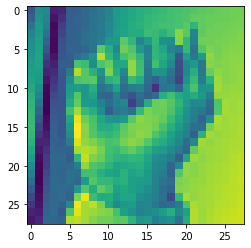

In [14]:
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)

plt.imshow(x_train[0].reshape(28,28))

Building our own dataset

In [15]:
class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'O', 'P','Q', 'R', 'S','T','U','V','W','X','Y']

In [16]:
# Function to setup the directories

IMAGES_PATH = os.path.join('Tensorflow', 'workspace', 'images')
IMAGES_PATH
os.name

'posix'

In [17]:
if not os.path.exists(IMAGES_PATH):
    if os.name == 'posix':
        !mkdir -p {IMAGES_PATH}
    if os.name == 'nt':
        !mkdir {IMAGES_PATH}

for name in class_names:
    path = os.path.join(IMAGES_PATH, name)
    if not os.path.exists(path):
        !mkdir {path}



In [18]:
# This code was used to capture the images we do not need to run it again therefore, it has been commented out.

# for name in class_names: 
#     cap = cv2.VideoCapture(0) #Connects to our webcam; for could be 2 instead of 0
#     if cap.isOpened():
#         print('Collecting images for {}'.format(name))
#         #time.sleep(15)
#         for i in range(500):
#             print('Collecting image {}'.format(i))
#             ret, frame = cap.read()
#             imageName = os.path.join(IMAGES_PATH, name, name+'.'+'{}.jpg'.format(str(uuid.uuid1())))
#             cv2.imwrite(imageName, frame)
#             cv2.imshow('frame', frame)
#             #time.sleep(5)

#             if cv2.waitKey(1) & 0xFF == ord('q'):
#                 break
# cap.release()
# cv2.destroyAllWindows()


Labelling the colllected images

In [19]:
%pip install --upgrade pyqt5 lxml

Note: you may need to restart the kernel to use updated packages.


In [20]:
LABELING_PATH = os.path.join('Tensorflow', 'labelimg')

In [21]:
if not os.path.exists(LABELING_PATH):
    !mkdir {LABELING_PATH}
    !git clone https://github.com/tzutalin/LabelImg {LABELING_PATH}

In [29]:
if os.name == 'posix':
    !cd {LABELING_PATH} && make qt5py3
if os.name == 'nt':
    !cd {LABELING_PATH} && pyrcc5 -o libs/resources.py resources.qrc

pyrcc5 -o libs/resources.py resources.qrc


In [33]:
!cd {LABELING_PATH} && python labelImg.py
# 121

Image:/Users/ritvikseth/Desktop/ASL-Interpreter/Tensorflow/workspace/images/X/X.0ed5a326-3957-11ed-a53a-acde48001122.jpg -> Annotation:/Users/ritvikseth/Desktop/ASL-Interpreter/Tensorflow/workspace/images/X/X.0ed5a326-3957-11ed-a53a-acde48001122.xml
Image:/Users/ritvikseth/Desktop/ASL-Interpreter/Tensorflow/workspace/images/X/X.0edfafce-3957-11ed-a53a-acde48001122.jpg -> Annotation:/Users/ritvikseth/Desktop/ASL-Interpreter/Tensorflow/workspace/images/X/X.0edfafce-3957-11ed-a53a-acde48001122.xml
Image:/Users/ritvikseth/Desktop/ASL-Interpreter/Tensorflow/workspace/images/X/X.0eea1a2c-3957-11ed-a53a-acde48001122.jpg -> Annotation:/Users/ritvikseth/Desktop/ASL-Interpreter/Tensorflow/workspace/images/X/X.0eea1a2c-3957-11ed-a53a-acde48001122.xml
Image:/Users/ritvikseth/Desktop/ASL-Interpreter/Tensorflow/workspace/images/X/X.0ef41d74-3957-11ed-a53a-acde48001122.jpg -> Annotation:/Users/ritvikseth/Desktop/ASL-Interpreter/Tensorflow/workspace/images/X/X.0ef41d74-3957-11ed-a53a-acde48001122.xml
